In [1]:
# Copyright 2018-2020 Erasmus+ ICCT Project Consortium
#
# Redistribution and use in source and binary forms, with or without modification, 
# are permitted provided that the following conditions are met:
#
# 1. Redistributions of source code must retain the above copyright notice, 
# this list of conditions and the following disclaimer.
#
# 2. Redistributions in binary form must reproduce the above copyright notice, 
# this list of conditions and the following disclaimer in the documentation and/or 
# other materials provided with the distribution.
#
# 3. Neither the name of the copyright holder nor the names of its contributors
# may be used to endorse or promote products derived from this software without specific prior written permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, 
# INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED.
# IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, 
# OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, 
# OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, 
# OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE 
# POSSIBILITY OF SUCH DAMAGE.

In [2]:
from IPython.display import HTML

# # Cell visibility - COMPLETE:
# tag = HTML('''<style>
# div.input {
#    display:none;
# }
# </style>''')

#Cell visibility - TOGGLE:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<p style="text-align:right">
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.</p>''')
display(tag)

## Power of a complex number
This interactive example deals with raising a complex number to a given (integer) power. The selected complex number $z$, as well as its power, will be visualized in a complex plane and represented via mathematical notation.

You can choose the target complex number ($z$) directly on the plot (by simple clicking), or/and use input field at the same time. Exponentiation value can be selected among predefined integers. Selections are constrained so as to provide better visibility of the respective vectors in the plot widget.

<IPython.core.display.Javascript object>


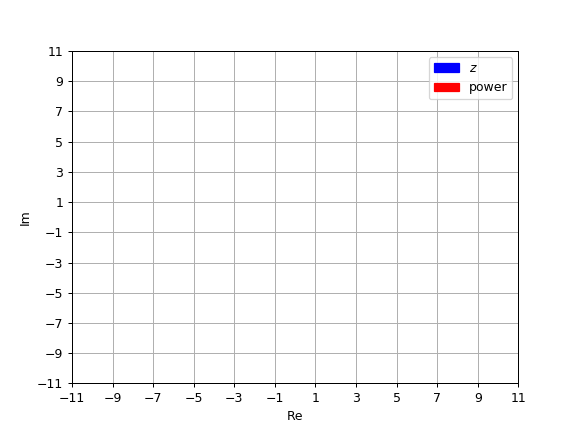

Output()

In [3]:
%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from IPython.display import HTML

red_patch = mpatches.Patch(color='blue', label='$z$')
blue_patch = mpatches.Patch(color='red', label='power')

# Init values

XLIM = 10
YLIM = 10
vectors_index_first = False;
V = [None, None]
V_complex = [None, None]

# Complex plane

fig = plt.figure(num='Power of a complex number')
ax = fig.add_subplot(1, 1, 1)

def get_interval(bottom, top):
    offset = int(10. / 100 * top)
    
    bottom = bottom - offset
    top = top + offset
    
    return bottom, top
    
def set_ticks():
    global XLIM, YLIM
           
    XLIMc = XLIM
    YLIMc = YLIM
    
    _, XLIMc = get_interval(-XLIM, XLIM)
    _, YLIMc = get_interval(-YLIMc, YLIMc)
    
    #print(stepx, stepy)
    major_ticks = np.linspace(-XLIMc, XLIMc, 12)
    major_ticks = [round(i) for i in major_ticks ]
    major_ticks_y = np.linspace(-YLIMc, YLIMc, 12)
    major_ticks_y = [round(i) for i in major_ticks_y ]
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks_y)
    ax.grid(which='both')

def clear_plot():
    plt.cla()
    set_ticks()
    ax.set_xlabel('Re')
    ax.set_ylabel('Im')
    plt.ylim([-YLIM, YLIM])
    plt.xlim([-XLIM, XLIM])
    plt.legend(handles=[red_patch, blue_patch])

clear_plot()
set_ticks()
plt.show()
set_ticks()

# Set a complex number using direct manipulation on the plot 
def set_vector(i, data_x, data_y):
    clear_plot()
    
    #V_complex.insert(i, complex(round(data_x, 2), round(data_y, 2)))
    ax.arrow(0, 0, data_x, data_y, head_width=0.25, head_length=0.5, color="b", length_includes_head=True)
    a1.value = round(data_x, 2)
    b1.value =  round(data_y, 2)
    max_bound()
    
def onclick(event):
    x = event.xdata
    y = event.ydata
    if (x > 10):
        x = 10.0
    if (x < - 10):
        x = -10.0
    
    if (y > 10):
        y = 10.0
        
    if (y < - 10):
        y = -10.0
    max_bound()
    set_vector(0, x, y)
    
        
fig.canvas.mpl_connect('button_press_event', onclick)

    
# Widgets
a1 = widgets.BoundedFloatText(layout=widgets.Layout(width='10%'), min = -10, max = 10, step = 0.5)
b1 = widgets.BoundedFloatText(layout=widgets.Layout(width='10%', margin='0px 20px 0px 0px'), min = -10, max = 10, step = 0.5)
button_set_z1 = widgets.Button(description="Plot z")

n = widgets.BoundedIntText(layout=widgets.Layout(width='10%', margin='0px 20px 0px 0px'), value = 1, min = 1, max = 5, step = 1)
power_button = widgets.Button(description="Calculate power")
reset_button = widgets.Button(description="Reset")

box_layout_1 = widgets.Layout(border='solid red', padding='10px', margin='0px 0px 20px 0px')
box_layout_2 = widgets.Layout(border='solid blue', padding='10px')

items_z1 = (widgets.Label("z = "), a1, widgets.Label("+ i * "), b1, button_set_z1)

items_2 = (widgets.Label("Power = "), n, power_button, reset_button)
box1 = widgets.Box(children=items_z1, layout=box_layout_1)
box2 = widgets.Box(children=items_2, layout=box_layout_2)
together = widgets.VBox([box1, box2])


display(together)
output = widgets.Output()
display(output)

# Set complex number using input widgets (Text and Button)
def on_button_set_z1_clicked(b):
    global XLIM, YLIM
    
    z1_old = V[0];
    z1_new = (0, 0, a1.value, b1.value)
    if z1_old != z1_new:
        set_vector(0, a1.value, b1.value)
    max_bound()
    change_lims()
    
def power_clicked(b):
    clear_plot()
    set_vector(0, a1.value, b1.value)
    change_lims()
    global XLIM, YLIM
    re = a1.value
    im = b1.value
    
    z = complex(re, im)
    
    z = z ** n.value
    
    v_color = "r"
    ax.arrow(0, 0, round(z.real,2), round(z.imag,2), head_width=0.25, head_length=0.5, color=v_color, length_includes_head=True)
    
    if abs(z.real) > XLIM:
        XLIM = round(abs(z.real) + 1)
    if abs(z.imag) > YLIM:
        YLIM = round(abs(z.imag) + 1)
    change_lims()
    
    with output:
        print("(",round(re,2), "+", "({})i".format(round(im,2)),")^", n.value,
             "=", round(z.real,2), "+", "({})i".format(round(z.imag,2)) )   
    
       
        
# Plot init methods        
def on_button_reset_clicked(b):
    global V, V_complex, XLIM, YLIM
    with output:
        output.clear_output()
        clear_plot()
        vectors_index_first = False;
        V = [None, None]
        V_complex = [None, None]
        a1.value = 0
        b1.value = 0
        XLIM = 10
        YLIM = 10
        change_lims()
        
def clear_plot():
    plt.cla()
    set_ticks()
    ax.set_xlabel('Re')
    ax.set_ylabel('Im')
    plt.ylim([-YLIM, YLIM])
    plt.xlim([-XLIM, XLIM])
    plt.legend(handles=[red_patch, blue_patch])

def change_lims():
    set_ticks()
    plt.ylim([-YLIM, YLIM])
    plt.xlim([-XLIM, XLIM])
    set_ticks()
    
def max_bound():
    global XLIM, YLIM
    mx = 0
    my = 0
    z = complex(a1.value, b1.value)
    if abs(z.real) > mx:
        mx = abs(z.real)
    if abs(z.imag) > my:
        my = abs(z.imag)
   
    if mx > XLIM:
        XLIM = round(mx + 1)
    else:
        XLIM = 10
    if my > YLIM:
        YLIM = round(my + 1)
    else:
        YLIM = 10
    change_lims()

# Button events
button_set_z1.on_click(on_button_set_z1_clicked)
power_button.on_click(power_clicked)
reset_button.on_click(on_button_reset_clicked)
